# Bike Sharing Assignment

### Problem Statement:

BoomBikes, a U.S.-based bike-sharing provider, has experienced a significant decline in revenues due to the ongoing COVID-19 pandemic. The company is facing challenges in sustaining its business during this period. However, as the economy begins to recover, BoomBikes is looking for ways to capitalize on the post-pandemic demand for shared bikes. To prepare for this rebound, the company seeks to understand the factors influencing bike demand in order to develop an effective business strategy that aligns with customer needs and market trends.

### Objective:


The goal is to create a multiple linear regression model that predicts bike demand based on factors such as weather and user behavior. This model will help BoomBikes:

1. Identify the key variables affecting bike demand.  
2. Assess how well these factors predict demand.  
3. Inform business strategies for post-pandemic recovery.
 
The insights will guide BoomBikes in adjusting their services to meet customer needs and optimize their operations in a recovering market.

### Step1: Reading and Understanding the Data

Let's first import Pandas and NumPy and read the dataset


In [1]:
# suppress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [5]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the day dataframe

In [7]:
day.shape

(730, 16)

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Removing unnecessary columns:

instant: This column is irrelevant as it only serves as a row number.  
dteday: This is not needed for analysis since the year and month have already been extracted into separate columns, and the day itself isn't useful for our analysis.  
casual: The count of casual users is not needed, as it can be derived from other data.  
registered: Similarly, the count of registered users is unnecessary for our analysis.  




In [13]:
day = day.drop(['instant','dteday','casual','registered'], axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# Renaming few columns for better understanding 
day.rename(columns={'yr':'year','mnth':'month','hum':"humidity",'cnt':'total_count'}, inplace=True)
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Encoding the season column

day.season = day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [21]:
# Encoding the month column

day.month = day.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [23]:
# Encoding the weekday column

day.weekday = day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [25]:
# Encoding the weathersit column

day.weathersit = day.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [27]:
day.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,total_count
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

We'll visualise out data using matplotlib and seaborn.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot for all numeric variables

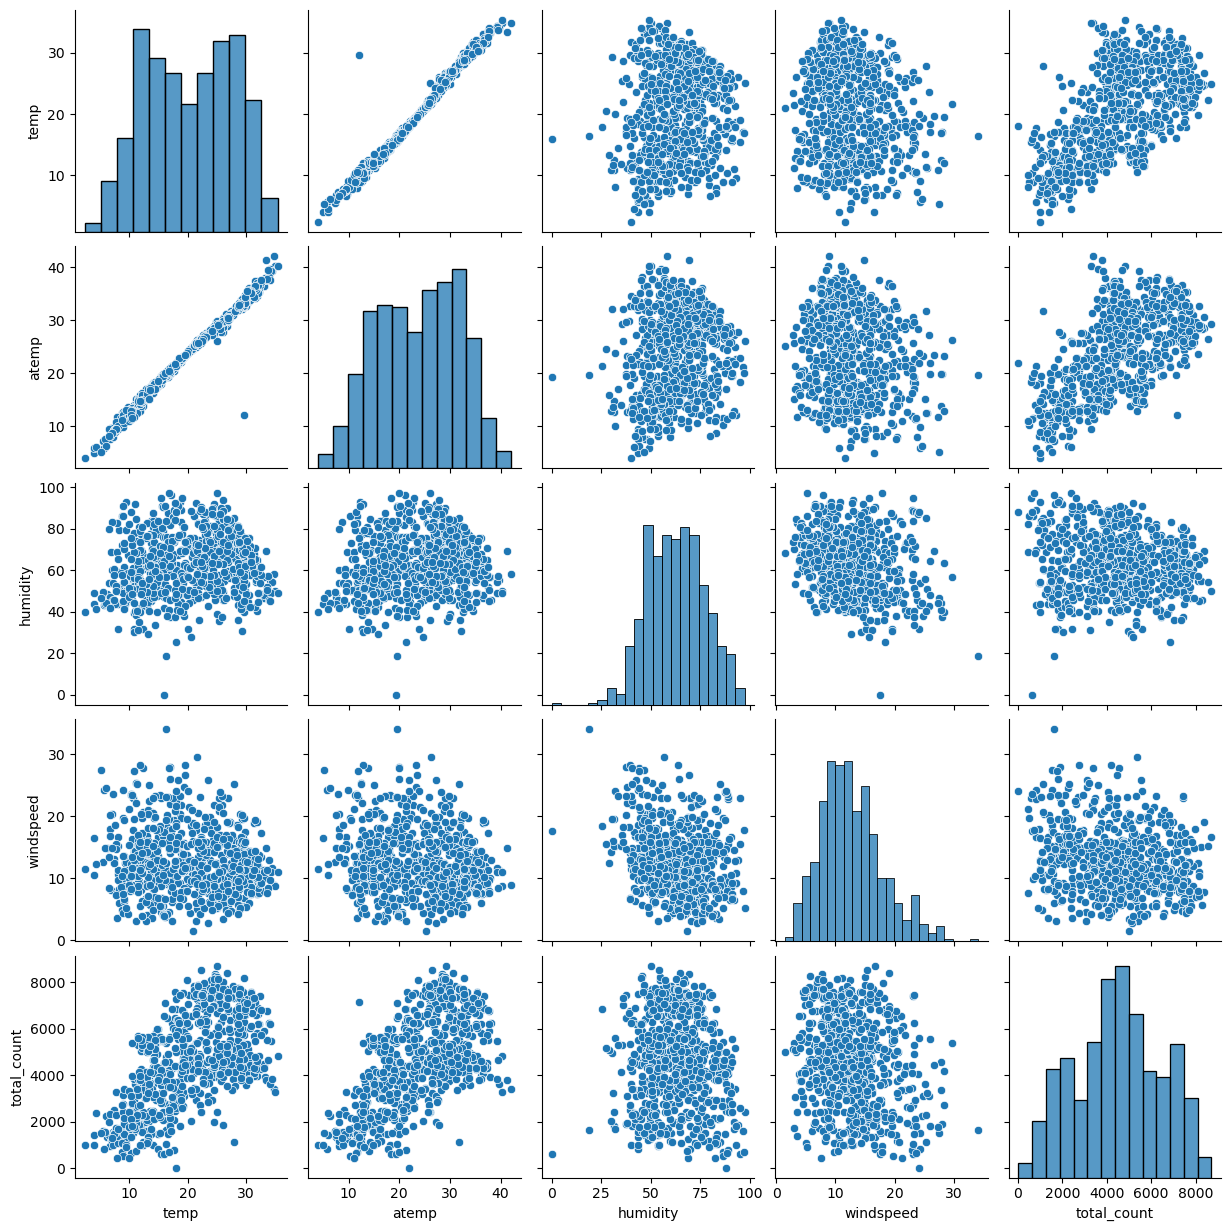

In [31]:
sns.pairplot(data=day,vars=['temp','atemp','humidity','windspeed','total_count'])
plt.show()

### Insights from the above plots for numerical variables:
1. temp and atemp are highly correlated; in fact, their graphs are almost identical, indicating a strong linear relationship between the two.  
2. The target variable, total_count, exhibits a linear relationship with both temp and atemp, suggesting that as either temperature (temp or atemp) increases, the total count of bikes also increases. 


### Let's now visualise the Catagorical Variables

<Figure size 2000x1800 with 0 Axes>

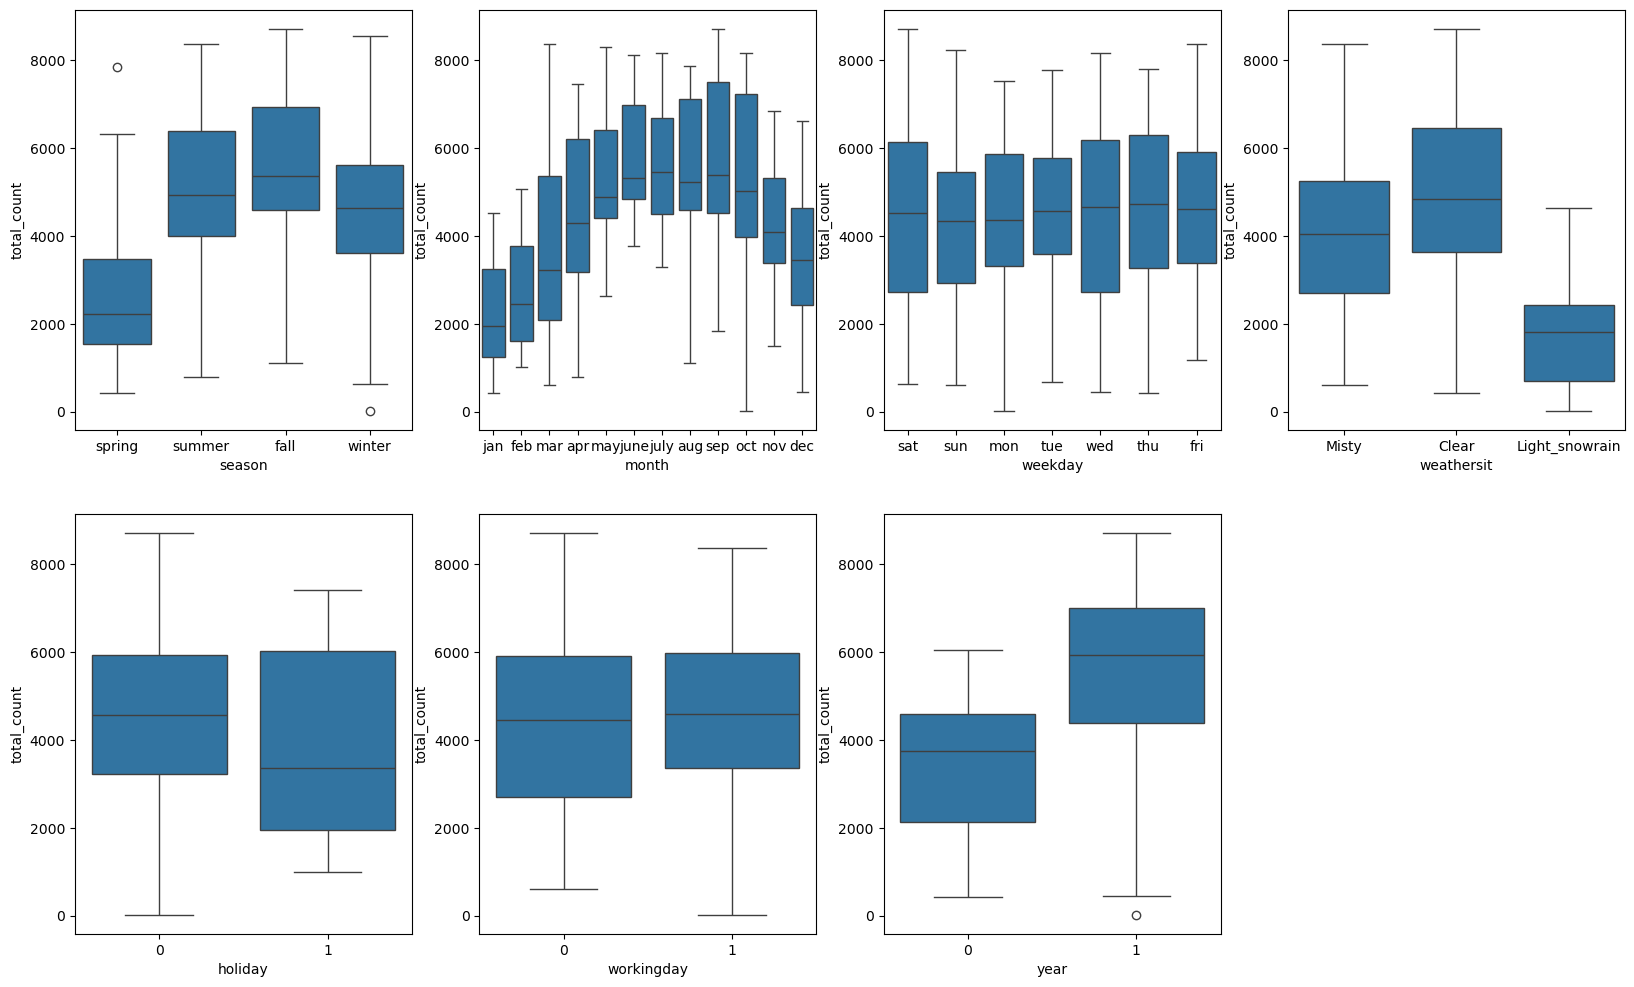

In [33]:
plt.figure(figsize=(20,18))

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'total_count', data = day)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'total_count', data = day)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'total_count', data = day)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'total_count', data = day)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'total_count', data = day)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'total_count', data = day)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'total_count', data = day)
plt.show()

#### Insights from the above box plots for categorical variables:
1. season: The majority of users prefer to rent bikes during the fall season (season_3). This is likely because fall, being a transitional season between summer and winter, offers moderate temperatures, making it ideal for biking.
2. month: The highest number of bike rentals occurs in August and September, making these the peak months for bike rentals compared to others.
3. weekday: On day 3 (Wednesday), bike rentals are typically higher than on other weekdays. This could be because Wednesday is the mid-week day, and many people may rent bikes to commute or enjoy a break from their routine.
4. weathersit: Bike rentals are more frequent when the weather is clear, with few clouds, or partly cloudy, suggesting that good weather conditions encourage more people to rent bikes.
5. holiday: Bike rentals are higher during holidays, as people take the opportunity to enjoy leisure time with family and friends.
6. workingday: Bike rentals are generally higher on non-working days compared to working days, as people have more free time to rent bikes.  
7. year: More users rented bikes in 2019 compared to 2018. This is typical in the initial years of a company's growth, where the number of users tends to increase significantly over time.




### Step 3: Data Preparation

#### Dummy Variables
Creating dummy variables for month, weekday, weathersit, and season variables.

In [35]:
day = pd.get_dummies(day, columns= ['season','weekday','weathersit','month'], drop_first=True).astype(int)
day.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_spring,season_summer,...,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep
0,0,0,0,14,18,80,10,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14,17,69,16,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8,9,43,16,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8,10,59,10,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9,11,43,12,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


### Step 4: Splitting the Data into Training and Testing Sets


In [37]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [39]:
df_train,df_test = train_test_split(day, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### Rescaling on Numeric Variables

In [41]:
# Using MinMaxScaler to Rescaling the features
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','humidity','windspeed','total_count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_spring,season_summer,...,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep
576,1,0,1,0.818182,0.769231,0.721649,0.28125,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.424242,0.435897,0.639175,0.25000,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.242424,0.205128,0.494845,0.65625,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.393939,0.384615,0.494845,0.18750,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0
111,0,0,1,0.333333,0.333333,0.742268,0.37500,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_spring,season_summer,...,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.533571,0.512217,0.645826,0.322917,0.513499,0.243137,0.247059,...,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392
std,0.500429,0.157763,0.468282,0.225145,0.207737,0.145867,0.165495,0.224421,0.429398,0.431725,...,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.333333,0.333333,0.536082,0.218750,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545455,0.538462,0.649485,0.312500,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.727273,0.692308,0.752577,0.406250,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Training the Model

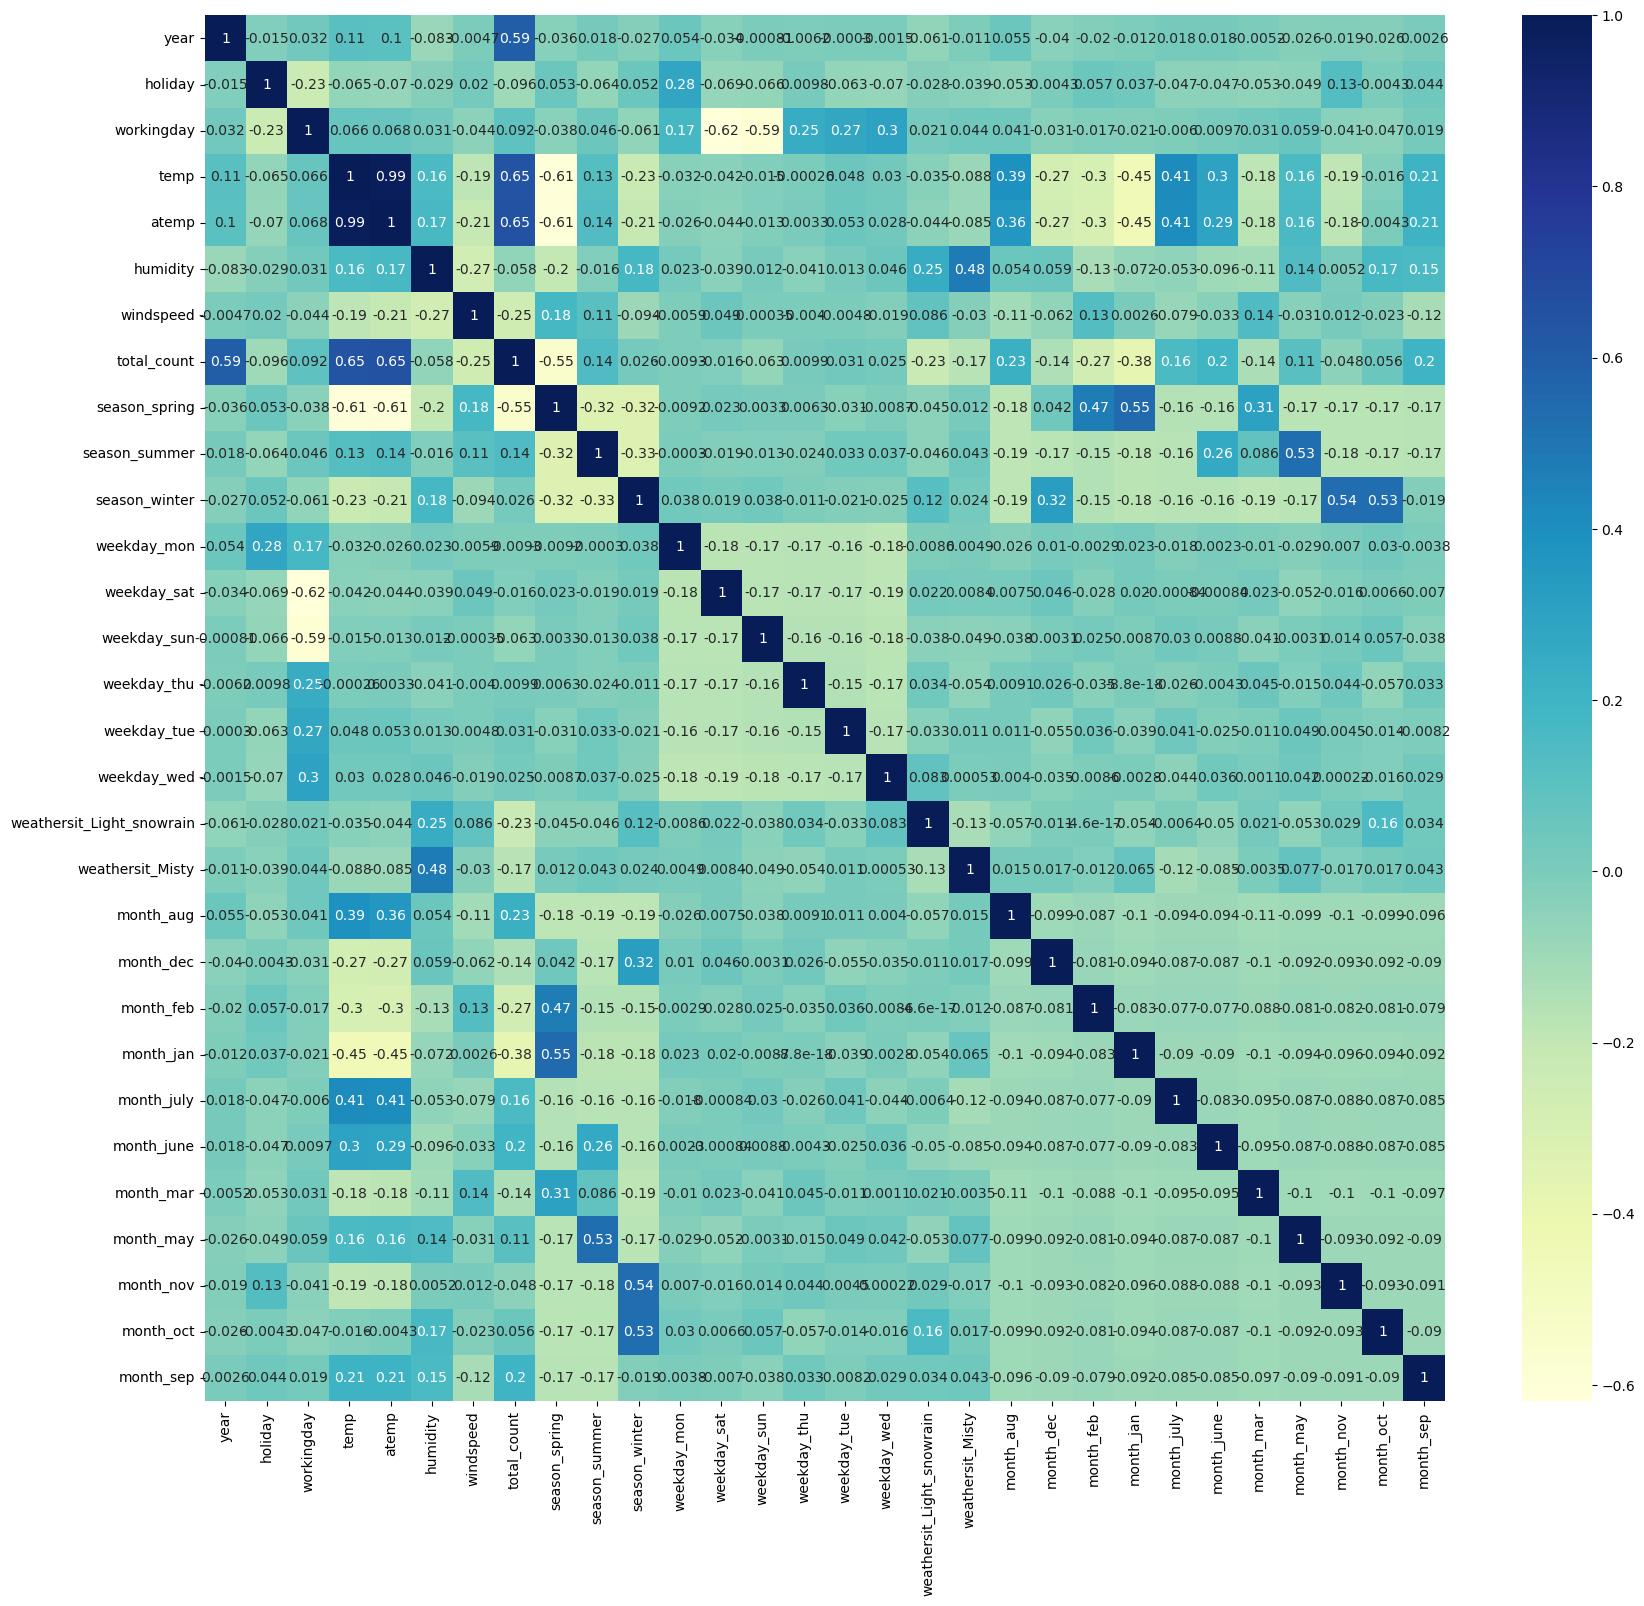

In [47]:
# Heatmap to see correlation of all the variables
plt.figure(figsize=(20,18))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Dividing into X and y sets for model building

In [49]:
# building the model
y_train = df_train.pop('total_count')
X_train = df_train

### Step 5: Adding all variables to the model

In [51]:
# Add a constant
X_train_sm = sm.add_constant(X_train)

# create the first fitted model
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.04
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          5.51e-180
Time:                        18:59:29   Log-Likelihood:                 526.40
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     481   BIC:                            -872.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2477      0.035      7.005      0.000       0.178       0.317
year                          0.2323      0.008     28.697      0.000       0.216       0.248
holiday                       0.0130      0.024      0.539      0.590      -0.034       0.060
workingday                    0.0975      0.012      7.939      0.000       0.073       0.122
temp                          0.3417      0.133      2.565      0.011       0.080       0.603
atemp                         0.1044      0.133      0.787      0.432      -0.156       0.365
humidity                     -0.1519      0.039     -3.924      0.000      -0.228      -0.076
windspeed                    -0.1848      0.027     -6.840      0.000      -0.238      -0.132
season_spring                -0.0482      0.030     -1.604      0.109      -0.107       0.011
season_summer                 0.0397      0.026      1.517      0.130      -0.012       0.091
season_winter                 0.1042      0.028      3.720      0.000       0.049       0.159
weekday_mon                  -0.0224      0.015     -1.455      0.146      -0.053       0.008
weekday_sat                   0.0959      0.014      6.941      0.000       0.069       0.123
weekday_sun                   0.0414      0.014      2.948      0.003       0.014       0.069
weekday_thu                  -0.0098      0.016     -0.625      0.532      -0.040       0.021
weekday_tue                  -0.0189      0.016     -1.209      0.227      -0.049       0.012
weekday_wed                  -0.0065      0.015     -0.431      0.667      -0.036       0.023
weathersit_Light_snowrain    -0.2556      0.027     -9.632      0.000      -0.308      -0.203
weathersit_Misty             -0.0598      0.010     -5.722      0.000      -0.080      -0.039
month_aug                     0.0231      0.034      0.679      0.497      -0.044       0.090
month_dec                    -0.0449      0.034     -1.332      0.183      -0.111       0.021
month_feb                    -0.0339      0.033     -1.028      0.305      -0.099       0.031
month_jan                    -0.0651      0.034     -1.937      0.053      -0.131       0.001
month_july                   -0.0312      0.035     -0.887      0.375      -0.100       0.038
month_june                    0.0080      0.025      0.320      0.749      -0.041       0.057
month_mar                     0.0021      0.025      0.084      0.933      -0.046       0.050
month_may                     0.0264      0.021      1.247      0.213      -0.015       0.068
month_nov                    -0.0405      0.036     -1.110      0.267      -0.112       0.031
month_oct                     0.0073      0.036      0.202      0.840      -0.063       0.078
month_sep                     0.0867      0.032      2.704      0.007      

#### Checking VIF

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,85.37
3,temp,58.11
4,atemp,49.10
11,weekday_sat,19.74
12,weekday_sun,18.39
7,season_spring,10.74
9,season_winter,9.44
8,season_summer,8.26
26,month_nov,6.78
18,month_aug,6.48


In [55]:
# dropping month_oct having high p and VIF value
X = X_train.drop('month_oct',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          5.48e-181
Time:                        18:59:37   Log-Likelihood:                 526.38
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     482   BIC:                            -878.2
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2502      0.033      7.532      0.000       0.185       0.315
year                          0.2322      0.008     28.744      0.000       0.216       0.248
holiday                       0.0138      0.024      0.582      0.561      -0.033       0.061
workingday                    0.0980      0.012      8.170      0.000       0.074       0.122
temp                          0.3418      0.133      2.568      0.011       0.080       0.603
atemp                         0.1041      0.133      0.785      0.433      -0.156       0.365
humidity                     -0.1509      0.038     -3.932      0.000      -0.226      -0.076
windspeed                    -0.1847      0.027     -6.846      0.000      -0.238      -0.132
season_spring                -0.0481      0.030     -1.605      0.109      -0.107       0.011
season_summer                 0.0375      0.024      1.578      0.115      -0.009       0.084
season_winter                 0.1070      0.024      4.386      0.000       0.059       0.155
weekday_mon                  -0.0225      0.015     -1.458      0.145      -0.053       0.008
weekday_sat                   0.0964      0.014      7.129      0.000       0.070       0.123
weekday_sun                   0.0419      0.014      3.046      0.002       0.015       0.069
weekday_thu                  -0.0097      0.016     -0.623      0.534      -0.040       0.021
weekday_tue                  -0.0189      0.016     -1.213      0.226      -0.049       0.012
weekday_wed                  -0.0065      0.015     -0.432      0.666      -0.036       0.023
weathersit_Light_snowrain    -0.2555      0.027     -9.640      0.000      -0.308      -0.203
weathersit_Misty             -0.0599      0.010     -5.736      0.000      -0.080      -0.039
month_aug                     0.0197      0.030      0.665      0.506      -0.039       0.078
month_dec                    -0.0503      0.020     -2.459      0.014      -0.090      -0.010
month_feb                    -0.0373      0.028     -1.318      0.188      -0.093       0.018
month_jan                    -0.0686      0.029     -2.371      0.018      -0.125      -0.012
month_july                   -0.0344      0.031     -1.105      0.270      -0.096       0.027
month_june                    0.0061      0.023      0.264      0.792      -0.039       0.052
month_mar                    -0.0005      0.021     -0.024      0.981      -0.042       0.041
month_may                     0.0252      0.020      1.240      0.216      -0.015       0.065
month_nov                    -0.0467      0.020     -2.395      0.017      -0.085      -0.008
month_sep                     0.0827      0.025      3.290      0.001       0.033       0.132
===========================================================================

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,76.01
3,temp,58.11
4,atemp,49.09
11,weekday_sat,17.55
12,weekday_sun,16.37
7,season_spring,10.74
9,season_winter,7.18
8,season_summer,6.81
18,month_aug,4.97
22,month_july,4.45


In [59]:
# dropping month_mar having high p 
X = X.drop('month_mar',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          5.25e-182
Time:                        18:59:44   Log-Likelihood:                 526.38
No. Observations:                 510   AIC:                            -998.8
Df Residuals:                     483   BIC:                            -884.4
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2500      0.032      7.716      0.000       0.186       0.314
year                          0.2322      0.008     28.779      0.000       0.216       0.248
holiday                       0.0138      0.024      0.582      0.561      -0.033       0.060
workingday                    0.0979      0.012      8.323      0.000       0.075       0.121
temp                          0.3419      0.133      2.576      0.010       0.081       0.603
atemp                         0.1041      0.132      0.786      0.432      -0.156       0.364
humidity                     -0.1510      0.038     -3.938      0.000      -0.226      -0.076
windspeed                    -0.1847      0.027     -6.865      0.000      -0.238      -0.132
season_spring                -0.0484      0.028     -1.743      0.082      -0.103       0.006
season_summer                 0.0375      0.024      1.580      0.115      -0.009       0.084
season_winter                 0.1070      0.024      4.410      0.000       0.059       0.155
weekday_mon                  -0.0225      0.015     -1.461      0.145      -0.053       0.008
weekday_sat                   0.0964      0.013      7.242      0.000       0.070       0.123
weekday_sun                   0.0419      0.014      3.072      0.002       0.015       0.069
weekday_thu                  -0.0097      0.016     -0.625      0.532      -0.040       0.021
weekday_tue                  -0.0189      0.016     -1.214      0.225      -0.049       0.012
weekday_wed                  -0.0065      0.015     -0.432      0.666      -0.036       0.023
weathersit_Light_snowrain    -0.2555      0.026     -9.650      0.000      -0.308      -0.203
weathersit_Misty             -0.0599      0.010     -5.742      0.000      -0.080      -0.039
month_aug                     0.0198      0.029      0.672      0.502      -0.038       0.078
month_dec                    -0.0501      0.018     -2.715      0.007      -0.086      -0.014
month_feb                    -0.0369      0.022     -1.699      0.090      -0.080       0.006
month_jan                    -0.0681      0.022     -3.126      0.002      -0.111      -0.025
month_july                   -0.0344      0.031     -1.108      0.269      -0.095       0.027
month_june                    0.0062      0.023      0.272      0.785      -0.039       0.051
month_may                     0.0254      0.020      1.288      0.198      -0.013       0.064
month_nov                    -0.0466      0.019     -2.446      0.015      -0.084      -0.009
month_sep                     0.0828      0.025      3.332      0.001       0.034       0.132
==============================================================================
Omnibus:                       85.446   Durbin-Watson:                   2.057
Prob(Omnibu

In [61]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,72.11
3,temp,57.95
4,atemp,49.09
11,weekday_sat,16.64
12,weekday_sun,15.63
7,season_spring,9.23
9,season_winter,7.12
8,season_summer,6.81
18,month_aug,4.91
22,month_july,4.42


In [63]:
# dropping temp having high p and high VIF
X = X.drop('temp',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     109.8
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.30e-181
Time:                        18:59:54   Log-Likelihood:                 522.90
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     484   BIC:                            -883.7
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2596      0.032      8.019      0.000       0.196       0.323
year                          0.2343      0.008     29.004      0.000       0.218       0.250
holiday                       0.0219      0.024      0.924      0.356      -0.025       0.068
workingday                    0.1000      0.012      8.471      0.000       0.077       0.123
atemp                         0.4245      0.046      9.300      0.000       0.335       0.514
humidity                     -0.1452      0.038     -3.772      0.000      -0.221      -0.070
windspeed                    -0.1709      0.027     -6.444      0.000      -0.223      -0.119
season_spring                -0.0553      0.028     -1.989      0.047      -0.110      -0.001
season_summer                 0.0312      0.024      1.316      0.189      -0.015       0.078
season_winter                 0.1030      0.024      4.228      0.000       0.055       0.151
weekday_mon                  -0.0262      0.015     -1.698      0.090      -0.056       0.004
weekday_sat                   0.0961      0.013      7.180      0.000       0.070       0.122
weekday_sun                   0.0416      0.014      3.035      0.003       0.015       0.069
weekday_thu                  -0.0125      0.016     -0.798      0.426      -0.043       0.018
weekday_tue                  -0.0215      0.016     -1.379      0.169      -0.052       0.009
weekday_wed                  -0.0081      0.015     -0.541      0.589      -0.038       0.021
weathersit_Light_snowrain    -0.2531      0.027     -9.510      0.000      -0.305      -0.201
weathersit_Misty             -0.0612      0.010     -5.840      0.000      -0.082      -0.041
month_aug                     0.0386      0.029      1.343      0.180      -0.018       0.095
month_dec                    -0.0559      0.018     -3.035      0.003      -0.092      -0.020
month_feb                    -0.0417      0.022     -1.919      0.056      -0.084       0.001
month_jan                    -0.0748      0.022     -3.436      0.001      -0.118      -0.032
month_july                   -0.0177      0.031     -0.580      0.562      -0.078       0.042
month_june                    0.0229      0.022      1.038      0.300      -0.020       0.066
month_may                     0.0361      0.019      1.867      0.063      -0.002       0.074
month_nov                    -0.0517      0.019     -2.712      0.007      -0.089      -0.014
month_sep                     0.0913      0.025      3.689      0.000       0.043       0.140
==============================================================================
Omnibus:                       84.622   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.460
Skew:                     

In [65]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,71.21
10,weekday_sat,16.51
11,weekday_sun,15.51
6,season_spring,9.15
8,season_winter,7.09
7,season_summer,6.74
3,atemp,5.77
17,month_aug,4.61
21,month_july,4.22
1,holiday,3.88


In [67]:
# dropping month_june having high p 
X = X.drop('month_june',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     114.3
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          2.05e-182
Time:                        19:00:02   Log-Likelihood:                 522.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     485   BIC:                            -888.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2624      0.032      8.133      0.000       0.199       0.326
year                          0.2337      0.008     29.001      0.000       0.218       0.250
holiday                       0.0212      0.024      0.897      0.370      -0.025       0.068
workingday                    0.1009      0.012      8.572      0.000       0.078       0.124
atemp                         0.4472      0.040     11.160      0.000       0.368       0.526
humidity                     -0.1500      0.038     -3.924      0.000      -0.225      -0.075
windspeed                    -0.1728      0.026     -6.532      0.000      -0.225      -0.121
season_spring                -0.0644      0.026     -2.439      0.015      -0.116      -0.013
season_summer                 0.0261      0.023      1.124      0.261      -0.020       0.072
season_winter                 0.0933      0.023      4.144      0.000       0.049       0.138
weekday_mon                  -0.0260      0.015     -1.688      0.092      -0.056       0.004
weekday_sat                   0.0974      0.013      7.314      0.000       0.071       0.124
weekday_sun                   0.0428      0.014      3.133      0.002       0.016       0.070
weekday_thu                  -0.0127      0.016     -0.816      0.415      -0.043       0.018
weekday_tue                  -0.0218      0.016     -1.397      0.163      -0.052       0.009
weekday_wed                  -0.0079      0.015     -0.524      0.601      -0.037       0.022
weathersit_Light_snowrain    -0.2528      0.027     -9.501      0.000      -0.305      -0.201
weathersit_Misty             -0.0607      0.010     -5.802      0.000      -0.081      -0.040
month_aug                     0.0219      0.024      0.919      0.358      -0.025       0.069
month_dec                    -0.0538      0.018     -2.942      0.003      -0.090      -0.018
month_feb                    -0.0391      0.022     -1.808      0.071      -0.082       0.003
month_jan                    -0.0706      0.021     -3.301      0.001      -0.113      -0.029
month_july                   -0.0361      0.025     -1.450      0.148      -0.085       0.013
month_may                     0.0274      0.017      1.572      0.117      -0.007       0.062
month_nov                    -0.0507      0.019     -2.661      0.008      -0.088      -0.013
month_sep                     0.0789      0.022      3.642      0.000       0.036       0.121
==============================================================================
Omnibus:                       82.802   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.570
Skew:                          -0.780   Prob(JB):                     4.26e-52
Kurtosis:                       5.950   C

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,70.65
10,weekday_sat,16.35
11,weekday_sun,15.37
6,season_spring,8.24
7,season_summer,6.44
8,season_winter,6.06
3,atemp,4.44
1,holiday,3.88
17,month_aug,3.17
21,month_july,2.81


In [71]:
# dropping weekday_wed having high p 
X = X.drop('weekday_wed',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     119.5
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          2.12e-183
Time:                        19:00:10   Log-Likelihood:                 522.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     486   BIC:                            -894.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2616      0.032      8.123      0.000       0.198       0.325
year                          0.2336      0.008     29.019      0.000       0.218       0.249
holiday                       0.0192      0.023      0.823      0.411      -0.027       0.065
workingday                    0.0984      0.011      9.151      0.000       0.077       0.120
atemp                         0.4463      0.040     11.156      0.000       0.368       0.525
humidity                     -0.1507      0.038     -3.949      0.000      -0.226      -0.076
windspeed                    -0.1728      0.026     -6.537      0.000      -0.225      -0.121
season_spring                -0.0647      0.026     -2.453      0.015      -0.117      -0.013
season_summer                 0.0258      0.023      1.112      0.267      -0.020       0.071
season_winter                 0.0933      0.023      4.144      0.000       0.049       0.137
weekday_mon                  -0.0217      0.013     -1.667      0.096      -0.047       0.004
weekday_sat                   0.0993      0.013      7.734      0.000       0.074       0.125
weekday_sun                   0.0447      0.013      3.389      0.001       0.019       0.071
weekday_thu                  -0.0083      0.013     -0.634      0.527      -0.034       0.018
weekday_tue                  -0.0174      0.013     -1.322      0.187      -0.043       0.008
weathersit_Light_snowrain    -0.2538      0.027     -9.569      0.000      -0.306      -0.202
weathersit_Misty             -0.0604      0.010     -5.785      0.000      -0.081      -0.040
month_aug                     0.0220      0.024      0.926      0.355      -0.025       0.069
month_dec                    -0.0538      0.018     -2.944      0.003      -0.090      -0.018
month_feb                    -0.0391      0.022     -1.811      0.071      -0.082       0.003
month_jan                    -0.0708      0.021     -3.313      0.001      -0.113      -0.029
month_july                   -0.0356      0.025     -1.434      0.152      -0.084       0.013
month_may                     0.0275      0.017      1.578      0.115      -0.007       0.062
month_nov                    -0.0512      0.019     -2.692      0.007      -0.088      -0.014
month_sep                     0.0787      0.022      3.638      0.000       0.036       0.121
==============================================================================
Omnibus:                       82.001   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.890
Skew:                          -0.771   Prob(JB):                     9.87e-52
Kurtosis:                       5.945   Cond. No.                     6.89e+15
========================================================

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,68.91
10,weekday_sat,16.31
11,weekday_sun,15.33
6,season_spring,8.24
7,season_summer,6.44
8,season_winter,6.06
3,atemp,4.44
1,holiday,3.83
16,month_aug,3.16
20,month_july,2.80


In [75]:
# dropping weekday_thu having high p 
X = X.drop('weekday_thu',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          2.29e-184
Time:                        19:00:19   Log-Likelihood:                 521.98
No. Observations:                 510   AIC:                            -998.0
Df Residuals:                     487   BIC:                            -900.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2602      0.032      8.104      0.000       0.197       0.323
year                          0.2336      0.008     29.037      0.000       0.218       0.249
holiday                       0.0171      0.023      0.741      0.459      -0.028       0.062
workingday                    0.0969      0.010      9.250      0.000       0.076       0.118
atemp                         0.4461      0.040     11.157      0.000       0.368       0.525
humidity                     -0.1503      0.038     -3.942      0.000      -0.225      -0.075
windspeed                    -0.1729      0.026     -6.544      0.000      -0.225      -0.121
season_spring                -0.0647      0.026     -2.454      0.014      -0.116      -0.013
season_summer                 0.0260      0.023      1.121      0.263      -0.020       0.072
season_winter                 0.0937      0.022      4.166      0.000       0.049       0.138
weekday_mon                  -0.0190      0.012     -1.546      0.123      -0.043       0.005
weekday_sat                   0.1004      0.013      7.900      0.000       0.075       0.125
weekday_sun                   0.0458      0.013      3.504      0.001       0.020       0.071
weekday_tue                  -0.0149      0.013     -1.185      0.237      -0.040       0.010
weathersit_Light_snowrain    -0.2541      0.027     -9.587      0.000      -0.306      -0.202
weathersit_Misty             -0.0601      0.010     -5.767      0.000      -0.081      -0.040
month_aug                     0.0222      0.024      0.935      0.350      -0.024       0.069
month_dec                    -0.0543      0.018     -2.974      0.003      -0.090      -0.018
month_feb                    -0.0387      0.022     -1.795      0.073      -0.081       0.004
month_jan                    -0.0708      0.021     -3.315      0.001      -0.113      -0.029
month_july                   -0.0353      0.025     -1.421      0.156      -0.084       0.014
month_may                     0.0276      0.017      1.588      0.113      -0.007       0.062
month_nov                    -0.0518      0.019     -2.733      0.006      -0.089      -0.015
month_sep                     0.0786      0.022      3.637      0.000       0.036       0.121
==============================================================================
Omnibus:                       82.496   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.108
Skew:                          -0.774   Prob(JB):                     1.97e-52
Kurtosis:                       5.968   Cond. No.                     7.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the er

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,67.98
10,weekday_sat,16.31
11,weekday_sun,15.33
6,season_spring,8.24
7,season_summer,6.44
8,season_winter,6.06
3,atemp,4.43
1,holiday,3.78
15,month_aug,3.16
19,month_july,2.80


In [79]:
# dropping month_aug having high p 
X = X.drop('month_aug',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     131.0
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          3.04e-185
Time:                        19:00:26   Log-Likelihood:                 521.52
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     488   BIC:                            -905.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2706      0.030      8.983      0.000       0.211       0.330
year                          0.2339      0.008     29.090      0.000       0.218       0.250
holiday                       0.0193      0.023      0.842      0.400      -0.026       0.064
workingday                    0.0995      0.010      9.862      0.000       0.080       0.119
atemp                         0.4479      0.040     11.217      0.000       0.369       0.526
humidity                     -0.1484      0.038     -3.898      0.000      -0.223      -0.074
windspeed                    -0.1731      0.026     -6.552      0.000      -0.225      -0.121
season_spring                -0.0793      0.021     -3.731      0.000      -0.121      -0.038
season_summer                 0.0107      0.016      0.651      0.515      -0.022       0.043
season_winter                 0.0802      0.017      4.642      0.000       0.046       0.114
weekday_mon                  -0.0192      0.012     -1.559      0.120      -0.043       0.005
weekday_sat                   0.1035      0.012      8.437      0.000       0.079       0.128
weekday_sun                   0.0482      0.013      3.765      0.000       0.023       0.073
weekday_tue                  -0.0146      0.013     -1.167      0.244      -0.039       0.010
weathersit_Light_snowrain    -0.2554      0.026     -9.651      0.000      -0.307      -0.203
weathersit_Misty             -0.0598      0.010     -5.742      0.000      -0.080      -0.039
month_dec                    -0.0556      0.018     -3.052      0.002      -0.091      -0.020
month_feb                    -0.0388      0.022     -1.801      0.072      -0.081       0.004
month_jan                    -0.0710      0.021     -3.324      0.001      -0.113      -0.029
month_july                   -0.0510      0.018     -2.806      0.005      -0.087      -0.015
month_may                     0.0272      0.017      1.564      0.118      -0.007       0.061
month_nov                    -0.0534      0.019     -2.828      0.005      -0.091      -0.016
month_sep                     0.0658      0.017      3.930      0.000       0.033       0.099
==============================================================================
Omnibus:                       83.945   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              243.918
Skew:                          -0.785   Prob(JB):                     1.08e-53
Kurtosis:                       6.002   Cond. No.                     6.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.25e-29. This might indicate that

In [81]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,59.54
10,weekday_sat,14.23
11,weekday_sun,13.60
6,season_spring,5.35
3,atemp,4.42
8,season_winter,3.58
1,holiday,3.48
7,season_summer,3.23
17,month_jan,2.36
4,humidity,1.98


In [83]:
# dropping weekday_tue having high p 
X = X.drop('weekday_tue',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     137.4
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          5.03e-186
Time:                        19:00:45   Log-Likelihood:                 520.81
No. Observations:                 510   AIC:                            -999.6
Df Residuals:                     489   BIC:                            -910.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2705      0.030      8.977      0.000       0.211       0.330
year                          0.2339      0.008     29.077      0.000       0.218       0.250
holiday                       0.0182      0.023      0.795      0.427      -0.027       0.063
workingday                    0.0975      0.010      9.803      0.000       0.078       0.117
atemp                         0.4477      0.040     11.208      0.000       0.369       0.526
humidity                     -0.1499      0.038     -3.937      0.000      -0.225      -0.075
windspeed                    -0.1736      0.026     -6.573      0.000      -0.226      -0.122
season_spring                -0.0792      0.021     -3.727      0.000      -0.121      -0.037
season_summer                 0.0103      0.016      0.626      0.531      -0.022       0.043
season_winter                 0.0796      0.017      4.606      0.000       0.046       0.114
weekday_mon                  -0.0158      0.012     -1.319      0.188      -0.039       0.008
weekday_sat                   0.1049      0.012      8.593      0.000       0.081       0.129
weekday_sun                   0.0498      0.013      3.912      0.000       0.025       0.075
weathersit_Light_snowrain    -0.2537      0.026     -9.598      0.000      -0.306      -0.202
weathersit_Misty             -0.0596      0.010     -5.719      0.000      -0.080      -0.039
month_dec                    -0.0548      0.018     -3.010      0.003      -0.091      -0.019
month_feb                    -0.0400      0.022     -1.855      0.064      -0.082       0.002
month_jan                    -0.0710      0.021     -3.322      0.001      -0.113      -0.029
month_july                   -0.0521      0.018     -2.864      0.004      -0.088      -0.016
month_may                     0.0270      0.017      1.552      0.121      -0.007       0.061
month_nov                    -0.0533      0.019     -2.821      0.005      -0.090      -0.016
month_sep                     0.0660      0.017      3.941      0.000       0.033       0.099
==============================================================================
Omnibus:                       84.036   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.646
Skew:                          -0.777   Prob(JB):                     3.74e-55
Kurtosis:                       6.063   Cond. No.                     6.68e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.42e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [85]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,59.40
10,weekday_sat,14.22
11,weekday_sun,13.59
6,season_spring,5.35
3,atemp,4.42
8,season_winter,3.57
1,holiday,3.48
7,season_summer,3.23
16,month_jan,2.36
4,humidity,1.98


In [87]:
# dropping weekday_mon having high p 
X = X.drop('weekday_mon',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     144.3
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          9.79e-187
Time:                        19:00:52   Log-Likelihood:                 519.91
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     490   BIC:                            -915.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2680      0.030      8.905      0.000       0.209       0.327
year                          0.2332      0.008     29.028      0.000       0.217       0.249
holiday                       0.0091      0.022      0.415      0.679      -0.034       0.052
workingday                    0.0977      0.010      9.809      0.000       0.078       0.117
atemp                         0.4494      0.040     11.250      0.000       0.371       0.528
humidity                     -0.1521      0.038     -3.996      0.000      -0.227      -0.077
windspeed                    -0.1740      0.026     -6.581      0.000      -0.226      -0.122
season_spring                -0.0786      0.021     -3.694      0.000      -0.120      -0.037
season_summer                 0.0100      0.016      0.606      0.545      -0.022       0.042
season_winter                 0.0789      0.017      4.564      0.000       0.045       0.113
weekday_sat                   0.1082      0.012      9.032      0.000       0.085       0.132
weekday_sun                   0.0531      0.012      4.249      0.000       0.029       0.078
weathersit_Light_snowrain    -0.2528      0.026     -9.559      0.000      -0.305      -0.201
weathersit_Misty             -0.0593      0.010     -5.687      0.000      -0.080      -0.039
month_dec                    -0.0544      0.018     -2.986      0.003      -0.090      -0.019
month_feb                    -0.0399      0.022     -1.848      0.065      -0.082       0.003
month_jan                    -0.0713      0.021     -3.337      0.001      -0.113      -0.029
month_july                   -0.0524      0.018     -2.882      0.004      -0.088      -0.017
month_may                     0.0279      0.017      1.604      0.109      -0.006       0.062
month_nov                    -0.0517      0.019     -2.742      0.006      -0.089      -0.015
month_sep                     0.0666      0.017      3.976      0.000       0.034       0.100
==============================================================================
Omnibus:                       82.732   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.221
Skew:                          -0.763   Prob(JB):                     1.26e-54
Kurtosis:                       6.058   Cond. No.                     6.92e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,59.26
9,weekday_sat,14.21
10,weekday_sun,13.58
6,season_spring,5.35
3,atemp,4.42
8,season_winter,3.57
1,holiday,3.35
7,season_summer,3.23
15,month_jan,2.36
4,humidity,1.98


In [91]:
# dropping month_may having high p 
X = X.drop('month_may',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          2.80e-187
Time:                        19:01:00   Log-Likelihood:                 518.57
No. Observations:                 510   AIC:                            -999.1
Df Residuals:                     491   BIC:                            -918.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2583      0.030      8.747      0.000       0.200       0.316
year                          0.2326      0.008     28.938      0.000       0.217       0.248
holiday                       0.0061      0.022      0.280      0.780      -0.037       0.049
workingday                    0.0957      0.010      9.670      0.000       0.076       0.115
atemp                         0.4598      0.039     11.641      0.000       0.382       0.537
humidity                     -0.1442      0.038     -3.815      0.000      -0.219      -0.070
windspeed                    -0.1755      0.026     -6.633      0.000      -0.228      -0.124
season_spring                -0.0746      0.021     -3.526      0.000      -0.116      -0.033
season_summer                 0.0214      0.015      1.443      0.150      -0.008       0.051
season_winter                 0.0808      0.017      4.678      0.000       0.047       0.115
weekday_sat                   0.1055      0.012      8.882      0.000       0.082       0.129
weekday_sun                   0.0509      0.012      4.096      0.000       0.027       0.075
weathersit_Light_snowrain    -0.2551      0.026     -9.645      0.000      -0.307      -0.203
weathersit_Misty             -0.0596      0.010     -5.706      0.000      -0.080      -0.039
month_dec                    -0.0530      0.018     -2.906      0.004      -0.089      -0.017
month_feb                    -0.0383      0.022     -1.777      0.076      -0.081       0.004
month_jan                    -0.0696      0.021     -3.252      0.001      -0.112      -0.028
month_july                   -0.0530      0.018     -2.909      0.004      -0.089      -0.017
month_nov                    -0.0499      0.019     -2.647      0.008      -0.087      -0.013
month_sep                     0.0665      0.017      3.960      0.000       0.034       0.099
==============================================================================
Omnibus:                       79.960   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.018
Skew:                          -0.757   Prob(JB):                     8.33e-50
Kurtosis:                       5.889   Cond. No.                     9.62e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.63e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,56.99
9,weekday_sat,13.63
10,weekday_sun,13.09
6,season_spring,5.28
3,atemp,4.30
8,season_winter,3.55
1,holiday,3.25
7,season_summer,2.62
15,month_jan,2.36
4,humidity,1.95


In [95]:
# dropping month_feb having high p 
X = X.drop('month_feb',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.04e-187
Time:                        19:01:07   Log-Likelihood:                 516.94
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     492   BIC:                            -921.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2482      0.029      8.546      0.000       0.191       0.305
year                          0.2323      0.008     28.841      0.000       0.216       0.248
holiday                       0.0016      0.022      0.075      0.940      -0.041       0.044
workingday                    0.0937      0.010      9.508      0.000       0.074       0.113
atemp                         0.4770      0.038     12.434      0.000       0.402       0.552
humidity                     -0.1461      0.038     -3.857      0.000      -0.220      -0.072
windspeed                    -0.1734      0.026     -6.545      0.000      -0.225      -0.121
season_spring                -0.0860      0.020     -4.256      0.000      -0.126      -0.046
season_summer                 0.0243      0.015      1.647      0.100      -0.005       0.053
season_winter                 0.0819      0.017      4.736      0.000       0.048       0.116
weekday_sat                   0.1042      0.012      8.768      0.000       0.081       0.128
weekday_sun                   0.0487      0.012      3.925      0.000       0.024       0.073
weathersit_Light_snowrain    -0.2536      0.026     -9.573      0.000      -0.306      -0.202
weathersit_Misty             -0.0593      0.010     -5.672      0.000      -0.080      -0.039
month_dec                    -0.0432      0.017     -2.482      0.013      -0.077      -0.009
month_jan                    -0.0491      0.018     -2.718      0.007      -0.085      -0.014
month_july                   -0.0541      0.018     -2.968      0.003      -0.090      -0.018
month_nov                    -0.0449      0.019     -2.403      0.017      -0.082      -0.008
month_sep                     0.0679      0.017      4.039      0.000       0.035       0.101
==============================================================================
Omnibus:                       75.100   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.118
Skew:                          -0.710   Prob(JB):                     5.27e-47
Kurtosis:                       5.831   Cond. No.                     8.97e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.87e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [97]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,54.96
9,weekday_sat,13.22
10,weekday_sun,12.64
6,season_spring,4.79
3,atemp,4.04
8,season_winter,3.55
1,holiday,3.14
7,season_summer,2.59
4,humidity,1.94
16,month_nov,1.76


In [99]:
# dropping season_summer having high p 
X = X.drop('season_summer',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          3.03e-188
Time:                        19:01:14   Log-Likelihood:                 515.54
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2692      0.026     10.303      0.000       0.218       0.321
year                          0.2327      0.008     28.855      0.000       0.217       0.248
holiday                       0.0070      0.022      0.327      0.744      -0.035       0.049
workingday                    0.0989      0.009     10.575      0.000       0.081       0.117
atemp                         0.4519      0.035     12.813      0.000       0.383       0.521
humidity                     -0.1403      0.038     -3.713      0.000      -0.214      -0.066
windspeed                    -0.1693      0.026     -6.408      0.000      -0.221      -0.117
season_spring                -0.1081      0.015     -7.147      0.000      -0.138      -0.078
season_winter                 0.0651      0.014      4.654      0.000       0.038       0.093
weekday_sat                   0.1093      0.011      9.520      0.000       0.087       0.132
weekday_sun                   0.0540      0.012      4.496      0.000       0.030       0.078
weathersit_Light_snowrain    -0.2568      0.026     -9.701      0.000      -0.309      -0.205
weathersit_Misty             -0.0600      0.010     -5.724      0.000      -0.081      -0.039
month_dec                    -0.0477      0.017     -2.770      0.006      -0.082      -0.014
month_jan                    -0.0528      0.018     -2.936      0.003      -0.088      -0.017
month_july                   -0.0649      0.017     -3.805      0.000      -0.098      -0.031
month_nov                    -0.0496      0.019     -2.680      0.008      -0.086      -0.013
month_sep                     0.0568      0.015      3.681      0.000       0.026       0.087
==============================================================================
Omnibus:                       75.521   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.413
Skew:                          -0.712   Prob(JB):                     1.67e-47
Kurtosis:                       5.848   Cond. No.                     9.45e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.65e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [101]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,44.02
8,weekday_sat,10.72
9,weekday_sun,10.31
3,atemp,3.41
1,holiday,2.72
6,season_spring,2.68
7,season_winter,2.31
4,humidity,1.93
15,month_nov,1.72
13,month_jan,1.65


In [103]:
# dropping holiday having high p 
X = X.drop('holiday',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     168.9
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          3.03e-188
Time:                        19:01:22   Log-Likelihood:                 515.54
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2762      0.041      6.744      0.000       0.196       0.357
year                          0.2327      0.008     28.855      0.000       0.217       0.248
workingday                    0.0918      0.026      3.571      0.000       0.041       0.142
atemp                         0.4519      0.035     12.813      0.000       0.383       0.521
humidity                     -0.1403      0.038     -3.713      0.000      -0.214      -0.066
windspeed                    -0.1693      0.026     -6.408      0.000      -0.221      -0.117
season_spring                -0.1081      0.015     -7.147      0.000      -0.138      -0.078
season_winter                 0.0651      0.014      4.654      0.000       0.038       0.093
weekday_sat                   0.1023      0.027      3.763      0.000       0.049       0.156
weekday_sun                   0.0469      0.027      1.718      0.086      -0.007       0.101
weathersit_Light_snowrain    -0.2568      0.026     -9.701      0.000      -0.309      -0.205
weathersit_Misty             -0.0600      0.010     -5.724      0.000      -0.081      -0.039
month_dec                    -0.0477      0.017     -2.770      0.006      -0.082      -0.014
month_jan                    -0.0528      0.018     -2.936      0.003      -0.088      -0.017
month_july                   -0.0649      0.017     -3.805      0.000      -0.098      -0.031
month_nov                    -0.0496      0.019     -2.680      0.008      -0.086      -0.013
month_sep                     0.0568      0.015      3.681      0.000       0.026       0.087
==============================================================================
Omnibus:                       75.521   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.413
Skew:                          -0.712   Prob(JB):                     1.67e-47
Kurtosis:                       5.848   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,30.81
2,atemp,19.92
1,workingday,17.36
4,windspeed,4.77
7,weekday_sat,4.69
8,weekday_sun,4.53
5,season_spring,3.05
6,season_winter,2.99
10,weathersit_Misty,2.31
0,year,2.08


In [107]:
# dropping humidity having high VIF
X = X.drop('humidity',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     174.8
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.95e-186
Time:                        19:01:34   Log-Likelihood:                 508.50
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     494   BIC:                            -917.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2041      0.037      5.588      0.000       0.132       0.276
year                          0.2360      0.008     29.086      0.000       0.220       0.252
workingday                    0.0931      0.026      3.576      0.000       0.042       0.144
atemp                         0.4185      0.035     12.116      0.000       0.351       0.486
windspeed                    -0.1447      0.026     -5.586      0.000      -0.196      -0.094
season_spring                -0.1104      0.015     -7.213      0.000      -0.141      -0.080
season_winter                 0.0572      0.014      4.085      0.000       0.030       0.085
weekday_sat                   0.1052      0.028      3.822      0.000       0.051       0.159
weekday_sun                   0.0453      0.028      1.639      0.102      -0.009       0.100
weathersit_Light_snowrain    -0.2964      0.025    -12.086      0.000      -0.345      -0.248
weathersit_Misty             -0.0824      0.009     -9.514      0.000      -0.099      -0.065
month_dec                    -0.0533      0.017     -3.067      0.002      -0.088      -0.019
month_jan                    -0.0578      0.018     -3.187      0.002      -0.094      -0.022
month_july                   -0.0578      0.017     -3.366      0.001      -0.092      -0.024
month_nov                    -0.0492      0.019     -2.624      0.009      -0.086      -0.012
month_sep                     0.0536      0.016      3.433      0.001       0.023       0.084
==============================================================================
Omnibus:                       79.664   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.915
Skew:                          -0.751   Prob(JB):                     5.32e-50
Kurtosis:                       5.902   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,14.42
2,atemp,13.48
3,windspeed,4.75
6,weekday_sat,4.09
7,weekday_sun,3.80
4,season_spring,2.84
5,season_winter,2.79
0,year,2.07
13,month_nov,1.79
11,month_jan,1.72


In [111]:
# dropping workingday having high VIF 
X = X.drop('workingday',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.0
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          7.57e-185
Time:                        19:01:49   Log-Likelihood:                 501.99
No. Observations:                 510   AIC:                            -974.0
Df Residuals:                     495   BIC:                            -910.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2957      0.026     11.243      0.000       0.244       0.347
year                          0.2365      0.008     28.802      0.000       0.220       0.253
atemp                         0.4178      0.035     11.957      0.000       0.349       0.486
windspeed                    -0.1466      0.026     -5.595      0.000      -0.198      -0.095
season_spring                -0.1132      0.015     -7.320      0.000      -0.144      -0.083
season_winter                 0.0568      0.014      4.008      0.000       0.029       0.085
weekday_sat                   0.0155      0.011      1.353      0.177      -0.007       0.038
weekday_sun                  -0.0443      0.012     -3.736      0.000      -0.068      -0.021
weathersit_Light_snowrain    -0.2928      0.025    -11.809      0.000      -0.342      -0.244
weathersit_Misty             -0.0808      0.009     -9.233      0.000      -0.098      -0.064
month_dec                    -0.0542      0.018     -3.081      0.002      -0.089      -0.020
month_jan                    -0.0589      0.018     -3.210      0.001      -0.095      -0.023
month_july                   -0.0570      0.017     -3.282      0.001      -0.091      -0.023
month_nov                    -0.0568      0.019     -3.014      0.003      -0.094      -0.020
month_sep                     0.0496      0.016      3.149      0.002       0.019       0.081
==============================================================================
Omnibus:                       91.904   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.420
Skew:                          -0.851   Prob(JB):                     4.24e-60
Kurtosis:                       6.158   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.83
2,windspeed,4.16
4,season_winter,2.59
3,season_spring,2.36
0,year,2.06
12,month_nov,1.79
10,month_jan,1.65
8,weathersit_Misty,1.54
9,month_dec,1.47
11,month_july,1.35


In [115]:
# dropping weekday_sat having high VIF 
X = X.drop('weekday_sat',axis=1)

#  create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.5
Date:                Wed, 01 Jan 2025   Prob (F-statistic):          1.32e-185
Time:                        19:01:56   Log-Likelihood:                 501.05
No. Observations:                 510   AIC:                            -974.1
Df Residuals:                     496   BIC:                            -914.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2984      0.026     11.367      0.000       0.247       0.350
year                          0.2361      0.008     28.750      0.000       0.220       0.252
atemp                         0.4170      0.035     11.925      0.000       0.348       0.486
windspeed                    -0.1449      0.026     -5.532      0.000      -0.196      -0.093
season_spring                -0.1133      0.015     -7.317      0.000      -0.144      -0.083
season_winter                 0.0573      0.014      4.041      0.000       0.029       0.085
weekday_sun                  -0.0471      0.012     -4.035      0.000      -0.070      -0.024
weathersit_Light_snowrain    -0.2927      0.025    -11.792      0.000      -0.341      -0.244
weathersit_Misty             -0.0808      0.009     -9.227      0.000      -0.098      -0.064
month_dec                    -0.0537      0.018     -3.048      0.002      -0.088      -0.019
month_jan                    -0.0587      0.018     -3.192      0.002      -0.095      -0.023
month_july                   -0.0564      0.017     -3.247      0.001      -0.091      -0.022
month_nov                    -0.0575      0.019     -3.049      0.002      -0.095      -0.020
month_sep                     0.0496      0.016      3.148      0.002       0.019       0.081
==============================================================================
Omnibus:                       87.722   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.840
Skew:                          -0.801   Prob(JB):                     2.54e-59
Kurtosis:                       6.183   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,4.77
2,windspeed,4.12
4,season_winter,2.58
3,season_spring,2.36
0,year,2.06
11,month_nov,1.79
9,month_jan,1.65
7,weathersit_Misty,1.54
8,month_dec,1.46
10,month_july,1.35


Now all the features have p-value less than 0.05 and VIF less than 5. So we go ahead and make our predictions using this model only.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

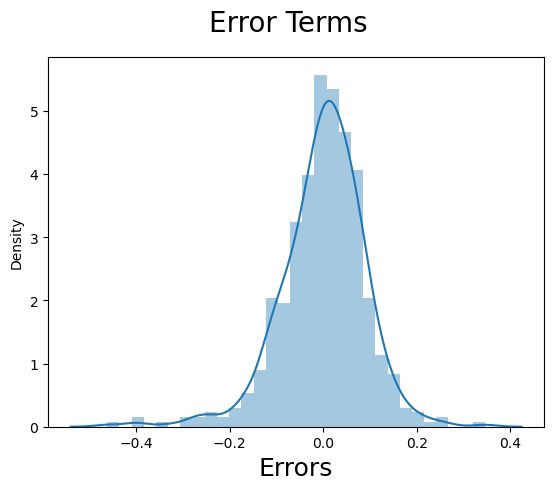

In [119]:
# Residual analysis
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred

# plot the residual
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

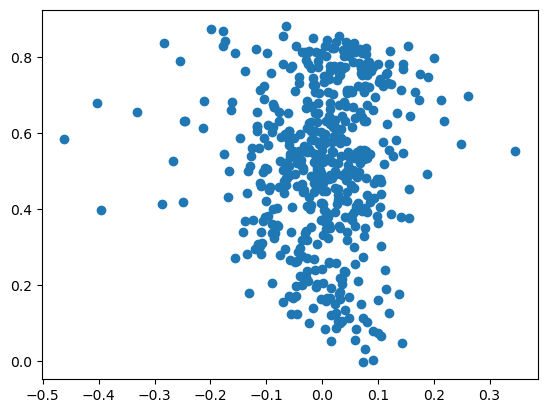

In [121]:
# Homoscedasticity 
plt.scatter(res, y_train_pred)
plt.show()

The above graph shows no discernible pattern, indicating that the assumption of homoscedasticity is satisfied.

### Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [123]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','total_count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_spring,season_summer,...,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep
184,0,1,0,0.818182,0.769231,0.649485,0.09375,0.692706,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.909091,0.846154,0.608247,0.15625,0.712034,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.515152,0.487179,0.835052,0.34375,0.303382,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.878788,0.794872,0.432990,0.34375,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.818182,0.743590,0.309278,0.53125,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [125]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,total_count,season_spring,season_summer,...,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.553857,0.532634,0.633646,0.315625,0.522154,0.254545,0.263636,...,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364
std,0.500809,0.187620,0.459303,0.232754,0.212565,0.148671,0.154914,0.219163,0.436599,0.441609,...,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541
min,0.000000,0.000000,0.000000,0.030303,0.025641,0.257732,-0.031250,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.363636,0.358974,0.523196,0.218750,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545455,0.538462,0.618557,0.312500,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757576,0.717949,0.742268,0.406250,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.969697,0.974359,1.000000,0.781250,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [127]:
# Splitting data into y_test and X_test
y_test = df_test.pop('total_count')
X_test = df_test

In [129]:
# adding a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,temp,atemp,humidity,windspeed,season_spring,season_summer,...,month_dec,month_feb,month_jan,month_july,month_june,month_mar,month_may,month_nov,month_oct,month_sep
184,1.0,0,1,0,0.818182,0.769231,0.649485,0.09375,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1.0,1,0,1,0.909091,0.846154,0.608247,0.15625,0,1,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.515152,0.487179,0.835052,0.34375,0,0,...,0,0,0,0,0,0,0,0,1,0
221,1.0,0,0,1,0.878788,0.794872,0.432990,0.34375,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.818182,0.743590,0.309278,0.53125,0,1,...,0,0,0,0,1,0,0,0,0,0


In [131]:
# dropping variables whiach are not in final model
X_test_sm = X_test_sm.drop(['month_oct', 'month_mar', 'temp', 'month_june', 'weekday_wed', 'weekday_thu',
                            'month_aug', 'weekday_tue', 'holiday', 'weekday_mon', 'month_may', 'month_feb',
                            'season_summer', 'humidity', 'workingday', 'weekday_sat'], axis=1)
X_test_sm.head()

,const,year,atemp,windspeed,season_spring,season_winter,weekday_sun,weathersit_Light_snowrain,weathersit_Misty,month_dec,month_jan,month_july,month_nov,month_sep
184,1.0,0,0.769231,0.09375,0,0,0,0,1,0,0,1,0,0
535,1.0,1,0.846154,0.15625,0,0,0,0,0,0,0,0,0,0
299,1.0,0,0.487179,0.34375,0,1,0,0,1,0,0,0,0,0
221,1.0,0,0.794872,0.34375,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0.743590,0.53125,0,0,0,0,0,0,0,0,0,0


In [133]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [135]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8201124273966588

### Step 8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

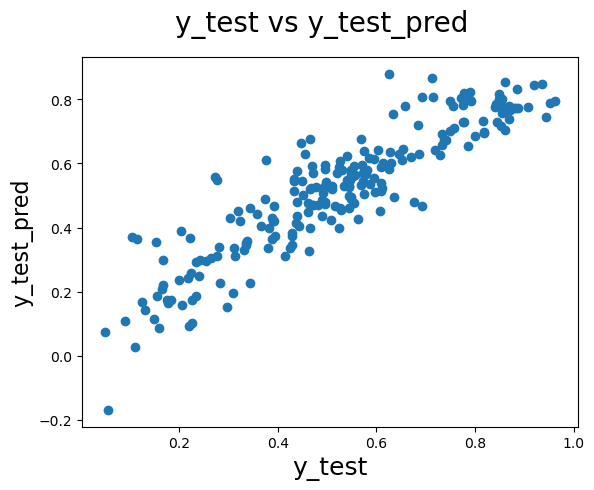

In [182]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16)